### GEBCO 2020 bathymetry data for SVB

GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Area bounded by N 30.5, E -113.7, S 26.8231, W -116.5.


In [1]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
nc_file = '../../bathy/GEBCO_SVB/gebco_2020_n30.5_s26.8231201171875_w-116.5_e-113.7.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (882,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (672,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_para

In [3]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

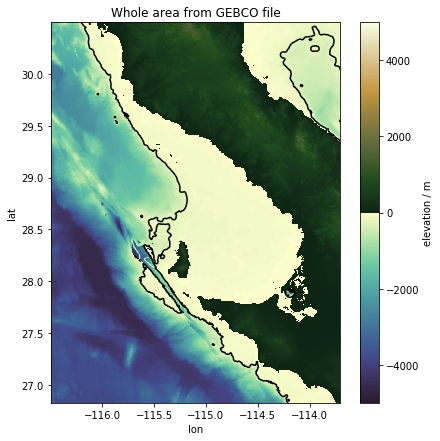

In [8]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon,lat, elev, cmap=cmo.cm.topo, vmin=-5000, vmax=5000)

cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='k', levels=[250])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Whole area from GEBCO file')

ax.set_aspect(1)

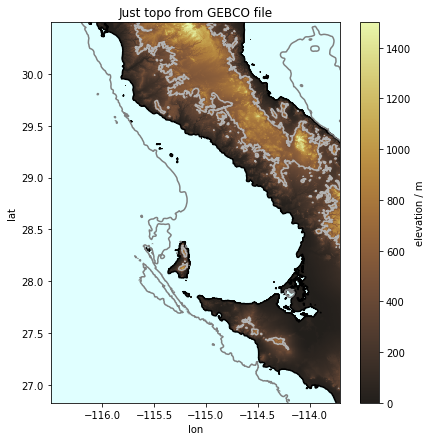

In [29]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.set_facecolor('lightcyan')
ocean_masked = np.ma.masked_less(elev,0)
ocean_mask = np.ma.getmask(ocean_masked)
just_land = np.ma.masked_array(elev,mask=ocean_mask)
pc2 = ax.pcolormesh(lon,lat, just_land, cmap=cmo.cm.turbid_r, vmin=0, vmax=1500)
cb = plt.colorbar(pc2)
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, just_land, colors='0.7', levels=[500])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Just topo from GEBCO file')

ax.set_aspect(1)

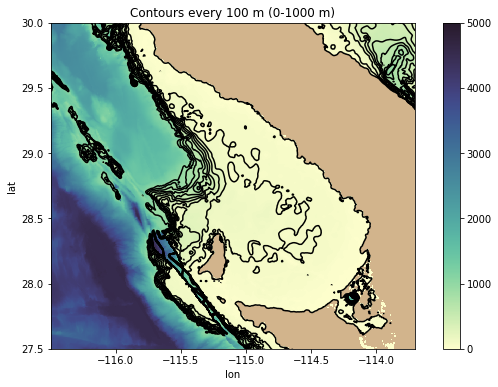

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.set_facecolor('tan')
mask_elev = np.ma.masked_greater(elev,0)
pc = ax.pcolormesh(lon,lat, -mask_elev, cmap=cmo.cm.deep, vmin=0, vmax=5000)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0,100,200,300,400,500,600,700,800,900,1000])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title('Contours every 100 m (0-1000 m)')
ax.set_ylim(27.5,30.0)
ax.set_aspect(1)

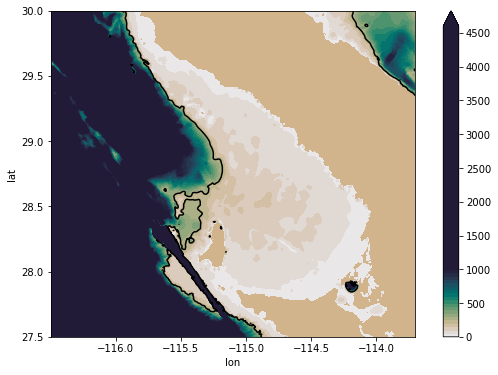

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat, -mask_elev,100, cmap=cmo.cm.rain, vmin=0, vmax=1000, extend='max')
cb = plt.colorbar(pc, extend='max')
cn = ax.contour(lon, lat, -elev, colors='k', levels=[250])
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_ylim(27.5,30)
ax.set_aspect(1)

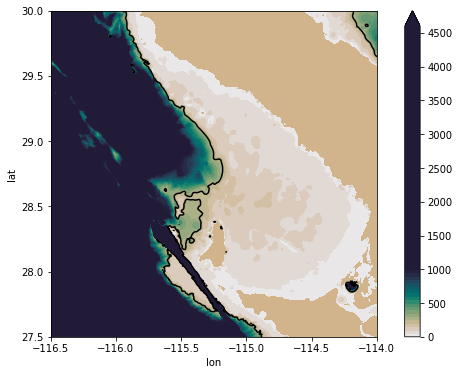

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat, -mask_elev,100, cmap=cmo.cm.rain, vmin=0, vmax=1000, extend='max')
cb = plt.colorbar(pc, extend='max')
cn = ax.contour(lon, lat, -elev, colors='k', levels=[250])
ax.set_ylim(27.5,30)
ax.set_xlim(-116.5,-114)
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

I can try out this domain w/ open boundaries. Smooth out small lagoons on the southeast corner. Flatten out bottom at 1000 m. Remove deep part in Ojo de Liebre.

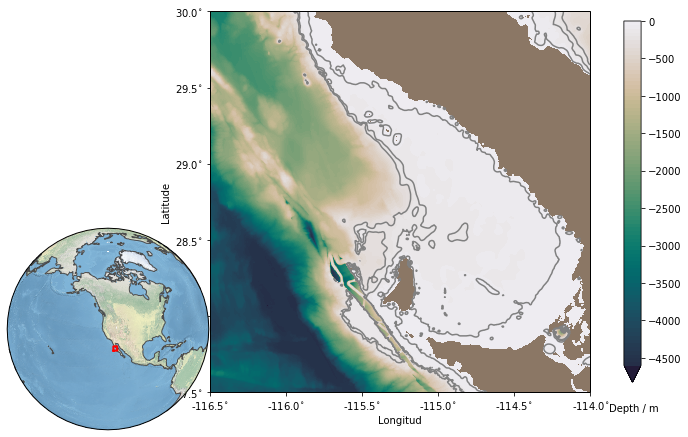

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12,7), subplot_kw={'projection': ccrs.PlateCarree()})
ax2 = fig.add_axes([0, 0, 0.4, 0.4], projection=ccrs.Orthographic(central_longitude=-120, central_latitude=40))
ax.background_patch.set_facecolor('#8b7765')

ax.set_extent([-116.5,-114, 27.5, 30.0])
bathy = Dataset('../../../PhD/thesis/figures/GEBCO_2019/GEBCO_2019.nc')
bat = ax.contourf(lon,lat, mask_elev,100, cmap=cmo.cm.rain_r, 
                  vmin=-5000, vmax=0,extend='min')
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[50,150,250])

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitud')
ax.set_xticks([-116.5,-116,-115.5,-115,-114.5,-114.0])
ax.set_yticks([27.5,28,28.5,29,29.5,30.0])
ax.set_xticklabels(['-116.5$^{\circ}$','-116.0$^{\circ}$','-115.5$^{\circ}$',
                    '-115.0$^{\circ}$','-114.5$^{\circ}$','-114.0$^{\circ}$'])
ax.set_yticklabels(['27.5$^{\circ}$','28.0$^{\circ}$',
                    '28.5$^{\circ}$','29.0$^{\circ}$','29.5$^{\circ}$','30.0$^{\circ}$' ])

ax.set_aspect(1)
plt.colorbar(bat, ax=ax, shrink=0.95, extendrect=False, extend='min')
ax.text(1.05,-0.05,'Depth / m', transform=ax.transAxes)
ax2.set_global()
ax2.coastlines(color='0.3')
ax2.stock_img()

ax2.plot([-116.5,-114.0,-114.0,-116.5,-116.5],[27.50,27.50,30.0,30.0,27.50],
         color='red', linewidth=2, 
         transform=ccrs.Geodetic(),
         )

def reposition():
    plt.draw()
    p1 = ax.get_position()
    p2 = ax2.get_position()
    #ax2.set_position([p1.x1-p2.width, p1.y1-p2.height, p2.width, p2.height])
    ax2.set_position([0.07, 0.05, p2.width, p2.height])

reposition()

plt.savefig('sebastian_vizcaino_map.png',format='png')
plt.show()


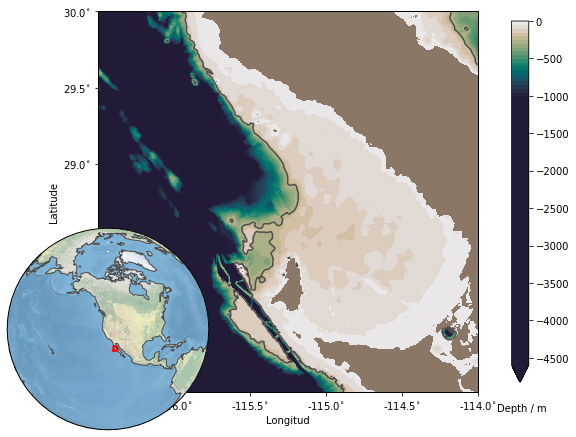

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,7), subplot_kw={'projection': ccrs.PlateCarree()})
ax2 = fig.add_axes([0, 0, 0.4, 0.4], projection=ccrs.Orthographic(central_longitude=-120, central_latitude=40))
ax.background_patch.set_facecolor('#8b7765')

ax.set_extent([-116.5,-114, 27.5, 30.0])
bathy = Dataset('../../../PhD/thesis/figures/GEBCO_2019/GEBCO_2019.nc')
bat = ax.contourf(lon,lat, mask_elev,100, cmap=cmo.cm.rain_r, 
                  vmin=-1000, vmax=0,extend='min')
cn = ax.contour(lon, lat, -elev, colors='0.3', levels=[250])

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitud')
ax.set_xticks([-116.5,-116,-115.5,-115,-114.5,-114.0])
ax.set_yticks([27.5,28,28.5,29,29.5,30.0])
ax.set_xticklabels(['-116.5$^{\circ}$','-116.0$^{\circ}$','-115.5$^{\circ}$',
                    '-115.0$^{\circ}$','-114.5$^{\circ}$','-114.0$^{\circ}$'])
ax.set_yticklabels(['27.5$^{\circ}$','28.0$^{\circ}$',
                    '28.5$^{\circ}$','29.0$^{\circ}$','29.5$^{\circ}$','30.0$^{\circ}$'])

ax.set_aspect(1)
plt.colorbar(bat, ax=ax, shrink=0.95, extendrect=False, extend='min')
ax.text(1.05,-0.05,'Depth / m', transform=ax.transAxes)
ax2.set_global()
ax2.coastlines(color='0.3')
ax2.stock_img()

ax2.plot([-116.5,-114.0,-114.0,-116.5,-116.5],[27.50,27.50,30.0,30.0,27.50],
         color='red', linewidth=2, 
         transform=ccrs.Geodetic(),
         )

def reposition():
    plt.draw()
    p1 = ax.get_position()
    p2 = ax2.get_position()
    #ax2.set_position([p1.x1-p2.width, p1.y1-p2.height, p2.width, p2.height])
    ax2.set_position([0.2, 0.05, p2.width, p2.height])

reposition()

plt.savefig('sebastian_vizcaino_map_upto1000m.png',format='png')
plt.show()


* Gray contour at 250 m 
* Colormap cut off at 1000 m
* This will be domain 1